## Library Import

In [48]:
#Import Libaries
from math import sqrt
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, LogisticRegression
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, confusion_matrix, ConfusionMatrixDisplay, classification_report, precision_score, recall_score, f1_score, accuracy_score
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
#from xgboost import XGBRegressor
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA, KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import re
import warnings
warnings.filterwarnings("ignore", message="X does not have valid feature names")




print("Libraries Imported")


Libraries Imported


# Inital Logistic Regression Model

## Preprocessing

In [49]:

df = pd.read_csv("data/emails.csv")
print(df.head())
df = df.drop('Email No.', axis=1)
X_df = df.iloc[: , :3000 ]
y_df = df.iloc[:, -1]

# Identify the amount of missing features in rows

  Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  jay  \
0   Email 1    0   0    1    0    0   0    2    0    0  ...         0    0   
1   Email 2    8  13   24    6    6   2  102    1   27  ...         0    0   
2   Email 3    0   0    1    0    0   0    8    0    0  ...         0    0   
3   Email 4    0   5   22    0    5   1   51    2   10  ...         0    0   
4   Email 5    7   6   17    1    5   2   57    0    9  ...         0    0   

   valued  lay  infrastructure  military  allowing  ff  dry  Prediction  
0       0    0               0         0         0   0    0           0  
1       0    0               0         0         0   1    0           0  
2       0    0               0         0         0   0    0           0  
3       0    0               0         0         0   0    0           0  
4       0    0               0         0         0   1    0           0  

[5 rows x 3002 columns]


In [50]:
# Identify the amount of missing features in rows and columns
missing_data = X_df.isnull().sum(axis=1)  # Sum of missing values per row
missing_columns = X_df.isnull().sum(axis=0)  # Sum of missing values per column

# Rows with missing data
rows_with_missing_data = missing_data[missing_data > 0]
print(f"Rows with missing data: {len(rows_with_missing_data)}")

# Columns with missing data
columns_with_missing_data = missing_columns[missing_columns > 0]
print(f"Columns with missing data: {len(columns_with_missing_data)}")


Rows with missing data: 0
Columns with missing data: 0


In [51]:

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.20, random_state=21)
display(X_train)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) #Fit Transform all numerical Values
X_test  = scaler.transform(X_test) #Transform all numerical Values

,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
3671,0,1,1,0,1,2,22,1,0,9,...,0,0,0,0,0,0,0,0,0,0
4397,3,6,1,5,0,0,45,2,0,6,...,0,0,0,0,0,0,0,0,0,0
2420,2,6,2,5,3,1,36,1,0,4,...,0,0,0,0,0,0,0,0,1,0
1814,0,0,1,0,1,0,11,0,0,0,...,0,0,0,0,0,0,0,0,0,0
347,6,2,3,2,2,2,27,2,0,6,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4298,3,11,3,3,4,2,41,2,1,8,...,0,0,0,0,0,0,0,0,2,0
4706,5,4,3,3,2,0,44,3,0,8,...,0,0,0,0,0,0,0,0,0,0
1144,1,1,3,0,1,0,27,0,0,3,...,0,0,0,0,0,0,0,0,1,0
48,13,9,3,2,6,3,48,3,0,10,...,0,0,0,0,0,0,0,0,1,0


In [52]:
model = LogisticRegression()
model.fit(X_train,y_train)

y_hat = model.predict(X_test)



accuracy = model.score(X_test, y_test)
Original_report = classification_report(y_test, y_hat)
print("Sample Predictions:", y_hat[:10])
print(Original_report)

Sample Predictions: [0 0 0 0 0 0 1 0 0 0]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       736
           1       0.94      0.97      0.95       299

    accuracy                           0.97      1035
   macro avg       0.96      0.97      0.97      1035
weighted avg       0.97      0.97      0.97      1035



Confusion Matrix:
[[716  20]
 [ 10 289]]


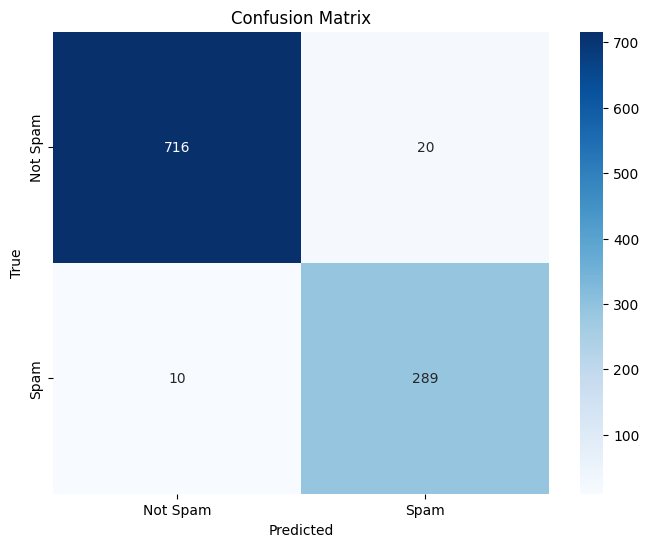

In [53]:
cm = confusion_matrix(y_test, y_hat)
print(f"Confusion Matrix:\n{cm}")

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# New Text Attempt

In [54]:
df = pd.read_csv("data/emails.csv")


df = df.drop('Email No.', axis=1)


X_df = df.iloc[:, :3000]  
y_df = df['Prediction']  

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=21)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)


model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


y_hat = model.predict(X_test)
print("Sample Predictions:", y_hat[:100])
Initial_Report = classification_report(y_test, y_hat)
print(Initial_Report)




Sample Predictions: [0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 1 0 1 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       736
           1       0.94      0.97      0.95       299

    accuracy                           0.97      1035
   macro avg       0.96      0.97      0.97      1035
weighted avg       0.97      0.97      0.97      1035



In [55]:
mse = mean_squared_error(y_test, y_hat)
rmse = np.sqrt(mse)

print(f"MSE :, {mse: .2f}")
print(f"RMSE:, {rmse: .2f}")


MSE :,  0.03
RMSE:,  0.17


### Email Prediction Function

In [56]:
def predict_email(model, scaler, X_df, email_text):
    """
    Convert a raw email string into a feature vector and predict spam (1) or not spam (0).
    """

    words = re.findall(r'\b\w+\b', email_text.lower())

    email_vector = np.zeros((1, X_df.shape[1]))


    for word in words:
        if word in X_df.columns:
            idx = X_df.columns.get_loc(word)
            email_vector[0, idx] += 1

    # Scale using the same scaler
    email_scaled = scaler.transform(email_vector)

    # Predict using your trained model
    prediction = model.predict(email_scaled)[0]
    prob = model.predict_proba(email_scaled)[0][prediction]

    label = "SPAM" if prediction == 1 else "NOT SPAM"
    print(f"\nPrediction: {label} (confidence: {prob:.4f})")

    return prediction


### Email Attempts

In [57]:
# Example inputs
email_1 = "Congratulations! You’ve won a $1000 gift card! Click here to claim your prize now!"
email_2 = "Hi John, could you send me the project files by tomorrow morning?"
email_3 = "Limited-time offer! Get 70\% off our premium subscription today only. Visit our website to upgrade now!"
email_4 = "Dear customer, your package has been shipped and will arrive by Friday. Track your order using the link below."
email_5 = "Reminder: Team meeting scheduled for 10 AM tomorrow. Please bring the updated report and presentation slides."

# Run predictions
predict_email(model, scaler, X_df, email_1)
predict_email(model, scaler, X_df, email_2)
predict_email(model, scaler, X_df, email_3)
predict_email(model, scaler, X_df, email_4)
predict_email(model, scaler, X_df, email_5)



Prediction: SPAM (confidence: 0.9389)

Prediction: NOT SPAM (confidence: 0.6575)

Prediction: SPAM (confidence: 0.9841)

Prediction: SPAM (confidence: 0.6585)

Prediction: NOT SPAM (confidence: 0.9905)


np.int64(0)

In [58]:
email_6 = """Dear LINKEDIN Customer,

We're currently upgrading our systems to bring enhanced features to your LINKEDIN Account experience. 
As a result, your account is temporarily unavailable.

Please Note: this upgrade your LINKEDIN Account to our new system.

Note: FAIL TO UPGRADE YOUR ACCOUNT, IT WILL BE AUTOMATICALLY CLOSED.

After this step, you are permitted to access your LINKEDIN Account.

We've upgraded your protection on LINKEDIN and will continue to enhance your account security.
To help us verify your account on our servers, please complete the following information requested:
(1) E-mail: _______  (2) Password: _______  (3) Confirm Password: _______

After completing your account verification, your LINKEDIN account will not be interrupted and it will continue working as normal.

Sincerely,
Customer Service Team.
Copyright © 2015 LINKEDIN.
"""
predict_email(model, scaler, X_df, email_6)


Prediction: SPAM (confidence: 0.9816)


np.int64(1)

In [59]:
email_7 = """Paw Boost
To: [redacted]

Re: GHOI8MLAS

PawBoost is an amber alert service for lost pets.
We exist to help people with lost pets raise local awareness for their situation so that they have a better chance at reuniting with their family member.
As an RFID device, a microchip doesn't require any power source, and it doesn't emit a signal. … It can't be used to locate a lost pet — it can only be used to find out the pet's microchip ID number after someone has found it and taken it somewhere with a microchip scanner. But on the conditions right now, the picture you sent to us match the same as the one we have. Please reply to this message with your
Full names
Address
Copy of front and back of your ID card or drivers license
Social security number."""
predict_email(model, scaler, X_df, email_7)


Prediction: SPAM (confidence: 0.7163)


np.int64(1)

In [60]:
email_7 = """
Subject: Project Update and Next Steps

Hi Sarah,

I hope this message finds you well. I wanted to provide you with an update on the current status of the marketing project. Our team has completed the initial research phase and has gathered valuable insights that will help us tailor our strategy effectively.

Over the next two weeks, we will be focusing on developing the campaign content and finalizing the budget. Please let me know if you have any specific requests or if you would like to schedule a meeting to discuss the details.

Additionally, I’ve attached the latest report summarizing our findings. Looking forward to your feedback.

Thank you for your continued support. 

Best regards,  
Michael  
Marketing Manager  
Acme Corp
"""
predict_email(model, scaler, X_df, email_7)



Prediction: SPAM (confidence: 0.9714)


np.int64(1)

In [61]:
email_8 = """
Subject: Quarterly Business Review - Meeting Confirmation

Dear Mr. Thompson,

I hope you are doing well. I am writing to confirm the details for our upcoming quarterly business review meeting, scheduled for next Tuesday, November 10th, at 2:00 PM. The meeting will be held in the main conference room on the 10th floor of our office building. 

During the meeting, we will be reviewing the performance metrics for the last quarter, discussing the progress of our ongoing initiatives, and outlining our goals for the upcoming quarter. I have attached the agenda and a brief summary of the key discussion points for your reference. Please feel free to suggest any additional topics or changes to the agenda.

If you have any questions before the meeting or require any further information, don’t hesitate to reach out. We are looking forward to seeing you there.

Best regards,  
Jane Davis  
Director of Operations  
XYZ Corporation  
Phone: (555) 123-4567  
Email: walc3290@stthomas.com
"""
predict_email(model, scaler, X_df, email_8)


Prediction: NOT SPAM (confidence: 0.9480)


np.int64(0)

In [62]:
email_9 = """Hello All,
A Police emergency concern on Campus? Kindly view update on the situation
http://duraciparkea.info/nc
Click or tap to follow link.
HERE and please follow the outlined protocol;
Thanks
Muhsen, Abed lyad II
University of North Carolina at Chapel Hill
153A Country Club Road
Chapel Hill, NC 27514
All rights reserved."""

predict_email(model, scaler, X_df, email_9)


Prediction: NOT SPAM (confidence: 0.7944)


np.int64(0)

In [63]:
email_10 ="""PayPal

Response required.

Dear User,

We emailed you a little while ago to ask for your help resolving an issue with your PayPal account. Your account is still temporarily limited because we haven’t heard from you.

We noticed some unusual log in activity with your account. Please check that no one has logged in to your account without your permission.

To help us with this and to see what you can and can’t do with your account until the issue is resolved, log in to your account and go to the Resolution Center.

As always, if you need help or have any questions, feel free to contact us. We’re always here to help.

Thank you for being a PayPal customer.

Sincerely,
PayPal"""

predict_email(model, scaler, X_df, email_10)


Prediction: SPAM (confidence: 0.5437)


np.int64(1)

In [64]:
email_11 = """ Good morning Tommie Volleyball Fans,

The Tommie Volleyball team is dancing in Minneapolis this week!

The Tommie Volleyball team clinched the Summit League Tournament Championship last week, and with it earned their first ever trip to the NCAA Volleyball Tournament. St. Thomas is set to take on Iowa State in the first-round this coming Friday, December 5th at 4:30 PM at Maturi Pavilion in Minneapolis!

Tickets for the Tommies' first appearance in the Division I NCAA Volleyball Tournament go on sale TODAY (Monday, December 1st) at 10 AM. Secure your seats for this historic matchup for Tommie Volleyball by clicking the button below!

Prior to the match, join fellow Tommie fans, alumni, and families at the NCAA Volleyball Tommie Tailgate being hosted in Dinkytown at Stub and Herbs.

📅 Friday, December 5, 2025
🕑 Time: 2:00 PM to 4:00 PM
📍 Location: Stub and Herbs, 227 Oak St SE, Minneapolis, MN 55414


o manage which communications you would like to receive, or to unsubscribe, please click here.
St. Thomas Athletics respects your privacy. Please note that by unsubscribing you are opting out of ALL email communications from St. Thomas Athletics.

University of St. Thomas
Department of Athletics | AARC 100 | 2115 Summit Avenue, St. Paul, MN 55105

Contact us at tommieathleticfund@stthomas.edu with any questio"""

predict_email(model, scaler, X_df, email_11)


Prediction: NOT SPAM (confidence: 0.9998)


np.int64(0)

# Logistic Regression with SMOTE

Confusion Matrix:
[[701  35]
 [  6 293]]


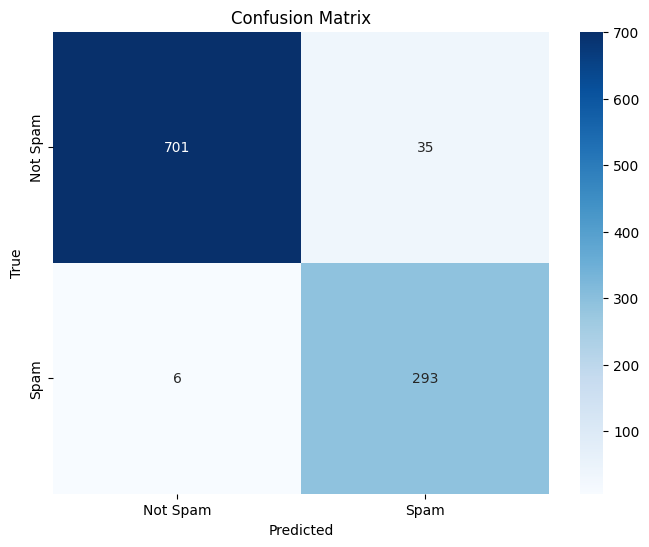

In [65]:
df = pd.read_csv("data/emails.csv")


df = df.drop('Email No.', axis=1)


X_df = df.iloc[:, :3000]  
y_df = df['Prediction']  

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=21)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

smote = SMOTE(random_state=42)
X_new, y_new = smote.fit_resample(X_train,y_train)
X_train = X_new
y_train = y_new

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


y_hat = model.predict(X_test)
report_from_SMOTE = classification_report(y_test, y_hat)
cm = confusion_matrix(y_test, y_hat)
print(f"Confusion Matrix:\n{cm}")

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



In [66]:
print("Classificatoin from SMOTE")
print(report_from_SMOTE)
print("Classification from no SMOTE")
print (Initial_Report)

Classificatoin from SMOTE
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       736
           1       0.89      0.98      0.93       299

    accuracy                           0.96      1035
   macro avg       0.94      0.97      0.95      1035
weighted avg       0.96      0.96      0.96      1035

Classification from no SMOTE
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       736
           1       0.94      0.97      0.95       299

    accuracy                           0.97      1035
   macro avg       0.96      0.97      0.97      1035
weighted avg       0.97      0.97      0.97      1035



In [67]:
email_6 = """Dear LINKEDIN Customer,

We're currently upgrading our systems to bring enhanced features to your LINKEDIN Account experience. 
As a result, your account is temporarily unavailable.

Please Note: this upgrade your LINKEDIN Account to our new system.

Note: FAIL TO UPGRADE YOUR ACCOUNT, IT WILL BE AUTOMATICALLY CLOSED.

After this step, you are permitted to access your LINKEDIN Account.

We've upgraded your protection on LINKEDIN and will continue to enhance your account security.
To help us verify your account on our servers, please complete the following information requested:
(1) E-mail: _______  (2) Password: _______  (3) Confirm Password: _______

After completing your account verification, your LINKEDIN account will not be interrupted and it will continue working as normal.

Sincerely,
Customer Service Team.
Copyright © 2015 LINKEDIN.
"""
predict_email(model, scaler, X_df, email_6)


Prediction: SPAM (confidence: 0.9493)


np.int64(1)

In [68]:
email_7 = """Paw Boost
To: [redacted]

Re: GHOI8MLAS

PawBoost is an amber alert service for lost pets.
We exist to help people with lost pets raise local awareness for their situation so that they have a better chance at reuniting with their family member.
As an RFID device, a microchip doesn't require any power source, and it doesn't emit a signal. … It can't be used to locate a lost pet — it can only be used to find out the pet's microchip ID number after someone has found it and taken it somewhere with a microchip scanner. But on the conditions right now, the picture you sent to us match the same as the one we have. Please reply to this message with your
Full names
Address
Copy of front and back of your ID card or drivers license
Social security number."""
predict_email(model, scaler, X_df, email_7)


Prediction: SPAM (confidence: 0.8008)


np.int64(1)

# SMOTE

loaded dataframe with 5172 rows


,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


Feature shape: (5172, 3000)
Target shape: (5172,)
Class distribution before SMOTE (training only):
Counter({0: 2570, 1: 1050})

Class distribution after SMOTE (training only):
Counter({0: 2570, 1: 2570})


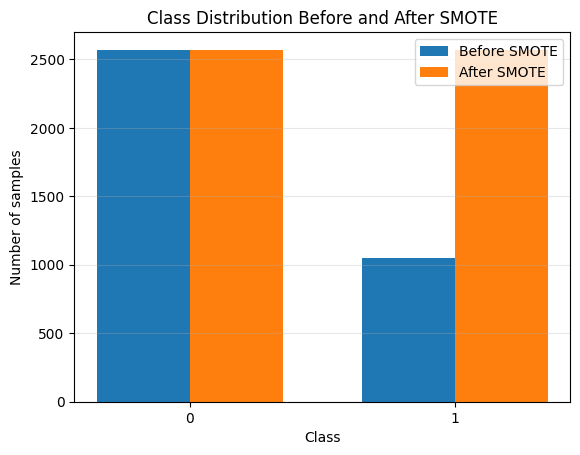

In [69]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Load data 
df = pd.read_csv('data/emails.csv')
print(f"loaded dataframe with {len(df)} rows")
display(df.head())

# Separate features and target
# Drop the ID column and the target column from X
X = df.drop(columns=['Email No.', 'Prediction'])
y = df['Prediction']

print("Feature shape:", X.shape)
print("Target shape:", y.shape)

# Train/test split (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Apply SMOTE on the training data
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

# Show Before and After class counts
print("Class distribution before SMOTE (training only):")
print(Counter(y_train))

print("\nClass distribution after SMOTE (training only):")
print(Counter(y_train_sm))

# Bar chart comparison
before_counts = Counter(y_train)
after_counts = Counter(y_train_sm)

labels = sorted(before_counts.keys())
before = [before_counts[l] for l in labels]
after = [after_counts[l] for l in labels]

x = np.arange(len(labels))
width = 0.35

plt.figure()
plt.bar(x - width/2, before, width, label='Before SMOTE')
plt.bar(x + width/2, after, width, label='After SMOTE')
plt.xticks(x, labels)
plt.xlabel('Class')
plt.ylabel('Number of samples')
plt.title('Class Distribution Before and After SMOTE')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.show()

# PCA

Original number of features: 3000
Reduced number of features with PCA: 196


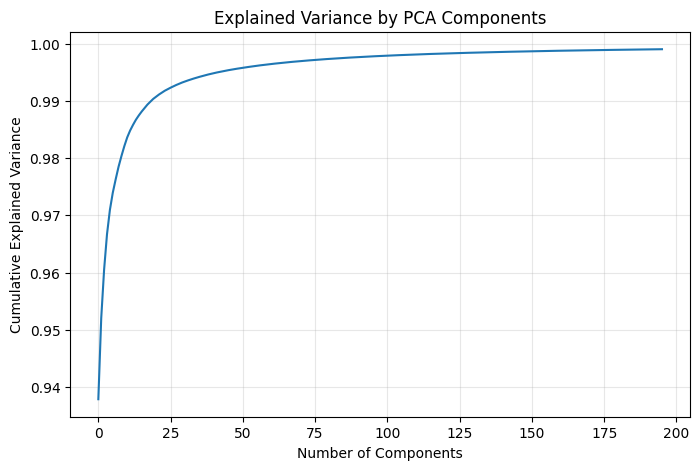

In [70]:
from sklearn.decomposition import PCA
# Keep 99.9% of variance
pca = PCA(n_components=0.999)

X_train_pca = pca.fit_transform(X_train_sm)
X_test_pca = pca.transform(X_test)

print("Original number of features:", X_train_sm.shape[1])
print("Reduced number of features with PCA:", X_train_pca.shape[1])

# Plot variance
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by PCA Components")
plt.grid(alpha=0.3)
plt.show()

# PCA components
n_components_pca = X_train_pca.shape[1]

# Kernel PCA

In [71]:
from sklearn.decomposition import KernelPCA

# Use same number of components as PCA
kpca = KernelPCA(n_components=n_components_pca, kernel="rbf", random_state=42)

X_train_kpca = kpca.fit_transform(X_train_sm)
X_test_kpca = kpca.transform(X_test)

print("Reduced number of features with Kernel PCA:", X_train_kpca.shape[1])


Reduced number of features with Kernel PCA: 196


# LDA

In [72]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)

X_train_lda = lda.fit_transform(X_train_sm, y_train_sm)
X_test_lda = lda.transform(X_test)

print("Reduced number of features with LDA:", X_train_lda.shape[1])

Reduced number of features with LDA: 1


# Dimentionality Reduction Comparison

In [73]:
n_pca  = X_train_pca.shape[1]
n_kpca = X_train_kpca.shape[1]
n_lda  = X_train_lda.shape[1]

dim_reduction_comparison = pd.DataFrame({
    "Method": ["PCA", "Kernel PCA", "LDA"],
    "Supervision": ["Unsupervised", "Unsupervised", "Supervised"],
    "Linear / Nonlinear": ["Linear", "Nonlinear (RBF kernel)", "Linear"],
    "Number of Components": [n_pca, n_kpca, n_lda],
})

print(dim_reduction_comparison)

       Method   Supervision      Linear / Nonlinear  Number of Components
0         PCA  Unsupervised                  Linear                   196
1  Kernel PCA  Unsupervised  Nonlinear (RBF kernel)                   196
2         LDA    Supervised                  Linear                     1


# Run Dimentionality Reduction Tactics Against All Models

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier

# Define feature sets
feature_sets = {
    "No Reduction": (X_train_sm, X_test),
    "PCA":          (X_train_pca, X_test_pca),
    "Kernel PCA":   (X_train_kpca, X_test_kpca),
    "LDA":          (X_train_lda, X_test_lda),
}

# 2. Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, n_jobs=-1, random_state=42),
    "Random Forest":       RandomForestClassifier(random_state=42),
    "XGBoost":             XGBClassifier(
                                n_estimators=200,
                                learning_rate=0.1,
                                max_depth=5,
                                subsample=0.8,
                                colsample_bytree=0.8,
                                tree_method="hist",
                                eval_metric="logloss",
                                random_state=42
                           ),
    "Decision Tree":       DecisionTreeClassifier(random_state=42),
    "Naive Bayes":         GaussianNB(),
    "SVM (RBF)":           SVC(kernel="rbf", probability=True, random_state=42),
    "SVM (Poly)":          SVC(kernel="poly", degree=3, probability=True, random_state=42),
}

# Run all combinations and collect metrics
results = []

for method_name, (Xtr, Xte) in feature_sets.items():
    for model_name, model in models.items():
        model.fit(Xtr, y_train_sm)
        y_pred = model.predict(Xte)

        acc  = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, average="macro", zero_division=0)
        rec  = recall_score(y_test, y_pred, average="macro", zero_division=0)
        f1   = f1_score(y_test, y_pred, average="macro", zero_division=0)

        results.append({
            "Method": method_name,
            "Model": model_name,
            "Accuracy": acc,
            "Precision (macro)": prec,
            "Recall (macro)": rec,
            "F1 (macro)": f1
        })

eval_df = pd.DataFrame(results)

# Sort table by Model
eval_df_sorted_by_model = eval_df.sort_values(by=["Model", "Method"])
eval_df_sorted_by_model


,Method,Model,Accuracy,Precision (macro),Recall (macro),F1 (macro)
17,Kernel PCA,Decision Tree,0.789948,0.745775,0.756765,0.750670
24,LDA,Decision Tree,0.805412,0.764051,0.779488,0.770680
3,No Reduction,Decision Tree,0.946521,0.934340,0.936046,0.935187
10,PCA,Decision Tree,0.807345,0.765862,0.773618,0.769482
14,Kernel PCA,Logistic Regression,0.869201,0.842051,0.838869,0.840431
21,LDA,Logistic Regression,0.807345,0.767073,0.788738,0.775694
0,No Reduction,Logistic Regression,0.974227,0.965958,0.971990,0.968906
7,PCA,Logistic Regression,0.957474,0.948887,0.947703,0.948292
18,Kernel PCA,Naive Bayes,0.713918,0.632427,0.527703,0.487164
25,LDA,Naive Bayes,0.804768,0.766732,0.798098,0.777307


# Accuracy Table

In [75]:
accuracy_table = eval_df.pivot(index="Model", columns="Method", values="Accuracy")

method_order = ["No Reduction", "PCA", "Kernel PCA", "LDA"]
accuracy_table = accuracy_table[method_order]

accuracy_table = accuracy_table.reindex(models.keys())

accuracy_table

Method,No Reduction,PCA,Kernel PCA,LDA
Model,,,,
Logistic Regression,0.974227,0.957474,0.869201,0.807345
Random Forest,0.974871,0.906572,0.873067,0.805412
XGBoost,0.972938,0.932345,0.887242,0.804768
Decision Tree,0.946521,0.807345,0.789948,0.805412
Naive Bayes,0.949742,0.423969,0.713918,0.804768
SVM (RBF),0.867268,0.870490,0.861469,0.781572
SVM (Poly),0.764820,0.750000,0.862113,0.806701


# Compare: No Reduction, PCA, KPCA, and LDA

<Figure size 1000x600 with 0 Axes>

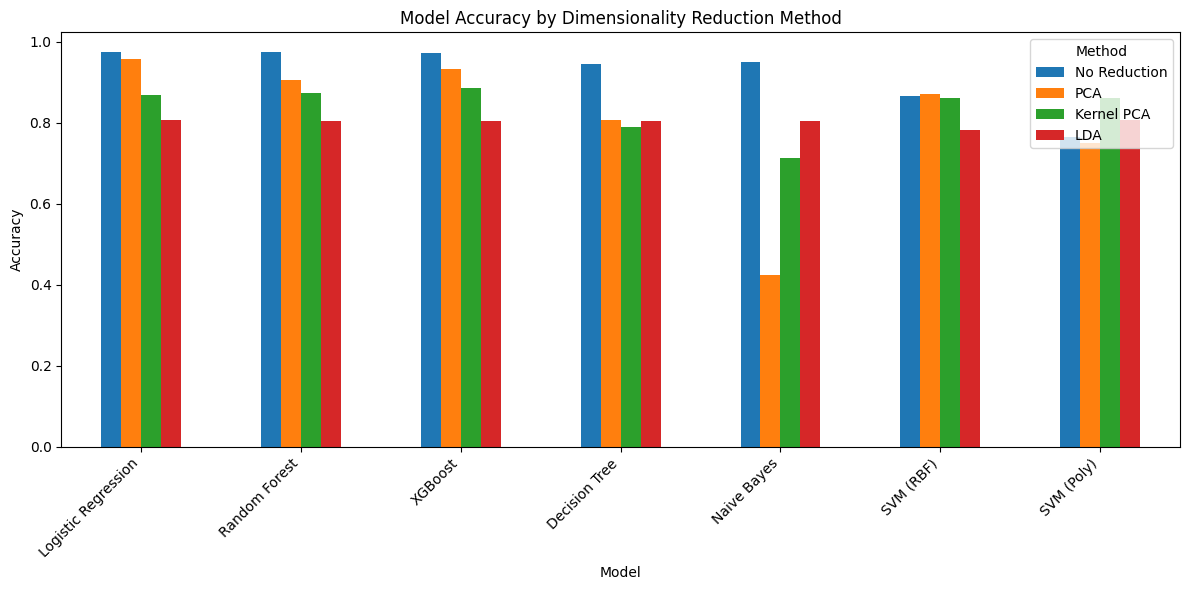

In [76]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
ax = accuracy_table.plot(kind="bar", figsize=(12, 6))

plt.ylabel("Accuracy")
plt.title("Model Accuracy by Dimensionality Reduction Method")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Method")
plt.tight_layout()
plt.show()


# Decision Tree

In [77]:
df = pd.read_csv('data/emails.csv')
df.head(5)

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


## Inspect Data

In [78]:
df = (df
 .drop(columns=['Email No.'])
)
(df
    # .Prediction.value_counts()
    # .isna().sum().T.cumsum()
    # .T
 .shape
)
dependent = ['Prediction']
X = df.iloc[:, :-1]
y = df[dependent]

## Train Test Split

In [79]:
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=21, stratify=y, test_size=0.25)
print(f'x_train: {x_train.shape}')
print(f'y_train: {y_train.shape}')
print(f'x_test: {x_test.shape}')
print(f'y_test: {y_test.shape}')

x_train: (3879, 3000)
y_train: (3879, 1)
x_test: (1293, 3000)
y_test: (1293, 1)


## Scale Data

In [80]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=scaler.get_feature_names_out())
x_test_scaled_df = pd.DataFrame(x_test_scaled, columns=scaler.get_feature_names_out())

##  Over Sample Minority Class

In [81]:
ovrsampler = SMOTE(random_state=21, k_neighbors=2)
x_train_resampled, y_train_resampled = ovrsampler.fit_resample(x_train_scaled_df, y_train)

## Explore Optimal PCA Features

In [82]:
def best_pca_model(x_train_resampled, y_train_resampled, x_test_scaled_df, y_test):
    func_x_train = x_train_resampled
    func_y_train = y_train_resampled
    func_x_test = x_test_scaled_df
    func_y_test = y_test
    score_dict = {}
    func_dtc = DecisionTreeClassifier(random_state=21)
    for i in range(7,30):
        func_pca = PCA(n_components=i, random_state=21)
        func_x_train_pca = func_pca.fit_transform(func_x_train)
        func_x_test_pca = func_pca.transform(func_x_test)
        func_x_train_pca_df = (pd.DataFrame(func_x_train_pca, columns=func_pca.get_feature_names_out()))
        func_x_test_pca_df = (pd.DataFrame(func_x_test_pca, columns=func_pca.get_feature_names_out()))
        model_fit = func_dtc.fit(func_x_train_pca_df, func_y_train)
        func_dtc_predict = func_dtc.predict(func_x_test_pca_df)
        score = f1_score(func_dtc_predict, func_y_test)
        new_entry = {f'{i}': score}
        score_dict.update(new_entry)
        key_with_max_value = max(score_dict, key=score_dict.get)
        max_value = score_dict[key_with_max_value]
    # print(f"Key with maximum value: {key_with_max_value}")
    # print(f"Maximum value: {max_value}")
    print(key_with_max_value)
    return
    key_with_max_value

In [83]:
best_pca_model_result = best_pca_model(x_train_resampled, y_train_resampled, x_test_scaled_df, y_test)

28


## Princial Components Analysis

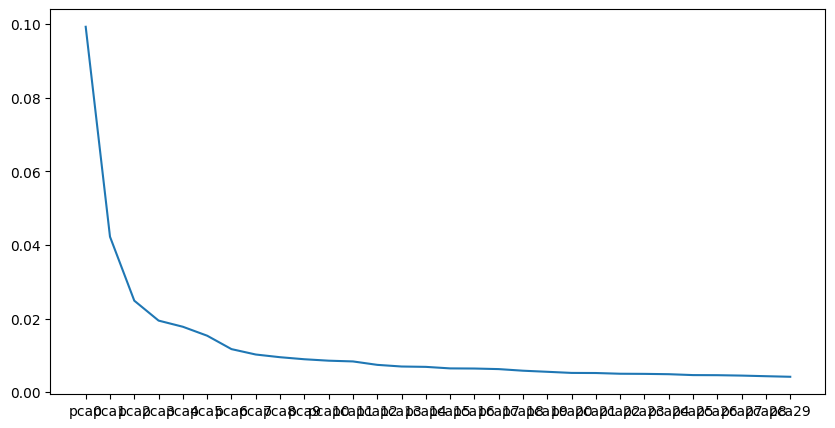

In [84]:
pca = PCA(n_components=30, random_state=21)
x_train_pca = pca.fit_transform(x_train_resampled, y_train_resampled)
x_test_pca = pca.transform(x_test_scaled_df)
fig, ax = plt.subplots(1,1, figsize=(10,5))
ax.plot(pca.get_feature_names_out(), pca.explained_variance_ratio_)
plt.show()

In [85]:
x_train_pca_df = (pd.DataFrame(x_train_pca, columns=pca.get_feature_names_out()))

In [86]:
x_test_pca_df = (pd.DataFrame(x_test_pca, columns=pca.get_feature_names_out()))

## Decision Tree Model

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       904
           1       0.89      0.86      0.87       389

    accuracy                           0.93      1293
   macro avg       0.92      0.91      0.91      1293
weighted avg       0.93      0.93      0.93      1293



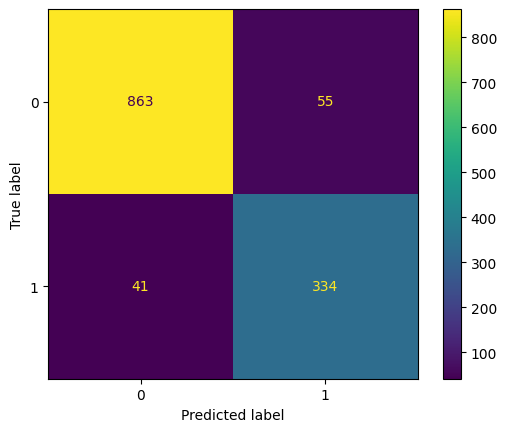

In [87]:
dtc = DecisionTreeClassifier(random_state=21)
dtc_fit = dtc.fit(x_train_pca_df, y_train_resampled)
dtc.get_depth()
dtc.get_n_leaves()
dtc_predict = dtc_fit.predict(x_test_pca_df)
f1_score(dtc_predict, y_test)
dtc_scores = classification_report(dtc_predict, y_test)
print(dtc_scores)
dtc_con_matrix = confusion_matrix(y_test, dtc_predict)
disp = ConfusionMatrixDisplay(dtc_con_matrix)
disp.plot()
plt.show()

## Cross Validation Analysis

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       907
           1       0.89      0.86      0.87       386

    accuracy                           0.92      1293
   macro avg       0.91      0.91      0.91      1293
weighted avg       0.92      0.92      0.92      1293



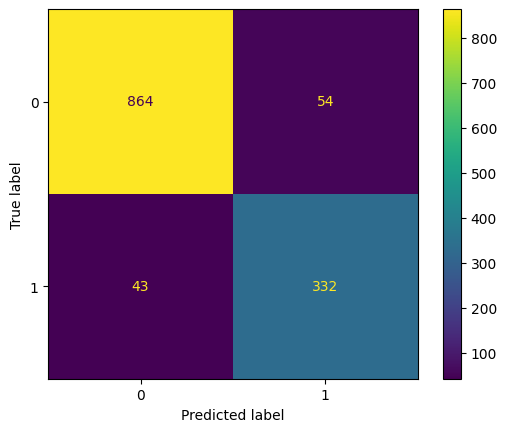

In [88]:
param_distributions = {
    'max_depth': [None] + list(range(10, 30, 2)),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
}
rcv = RandomizedSearchCV(
    estimator = dtc,     
    param_distributions=param_distributions,
    n_iter=100,
    cv=5,
    random_state=21)
rcv_fitted = rcv.fit(x_train_pca_df, y_train_resampled)
rcv_predict = rcv.predict(x_test_pca_df)
rcv_score = rcv.score(x_test_pca_df, y_test)
rcv_score
rcv_scores = classification_report(rcv_predict, y_test)
print(rcv_scores)

dtc_con_matrix = confusion_matrix(y_test, rcv_predict)
disp = ConfusionMatrixDisplay(dtc_con_matrix)
disp.plot()
plt.show()

In [89]:
params = {
'max_depth': list(range(2,40, 2)),
'min_samples_leaf': list(range(1,10)),
'min_samples_split': list(range(2,20, 2)),
}
grid_search = GridSearchCV(estimator=dtc,
param_grid=params, cv=5, n_jobs=-1,
verbose=1, scoring="accuracy")
grid_search.fit(x_train_pca_df, y_train_resampled)

Fitting 5 folds for each of 1539 candidates, totalling 7695 fits


,estimator,DecisionTreeC...ndom_state=21)
,param_grid,"{'max_depth': [2, 4, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 4, ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [90]:
grid_search.best_params_
new_dtc = DecisionTreeClassifier(max_depth= 10, min_samples_leaf= 5, min_samples_split= 12, random_state=21)
new_dtc_fit = new_dtc.fit(x_train_pca_df, y_train_resampled)
new_dtc_predict = new_dtc.predict(x_test_pca_df)
new_dtc_score = classification_report(new_dtc_predict, y_test)
print(new_dtc_score)

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       910
           1       0.89      0.87      0.88       383

    accuracy                           0.93      1293
   macro avg       0.91      0.91      0.91      1293
weighted avg       0.93      0.93      0.93      1293



# XGBoost

In [91]:
import pandas as pd
from scipy.stats import randint
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [92]:
df = pd.read_csv('data\emails.csv')
df.head(5)

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [93]:
df = (df
 .drop(columns=['Email No.'])
)
(df
    # .Prediction.value_counts()
    # .isna().sum().T.cumsum()
    # .T
 .shape
)
dependent = ['Prediction']
X = df.iloc[:, :-1]
y = df[dependent]
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=21, stratify=y, test_size=0.25)
print(f'x_train: {x_train.shape}')
print(f'y_train: {y_train.shape}')
print(f'x_test: {x_test.shape}')
print(f'y_test: {y_test.shape}')

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=scaler.get_feature_names_out())
x_test_scaled_df = pd.DataFrame(x_test_scaled, columns=scaler.get_feature_names_out())

x_train: (3879, 3000)
y_train: (3879, 1)
x_test: (1293, 3000)
y_test: (1293, 1)


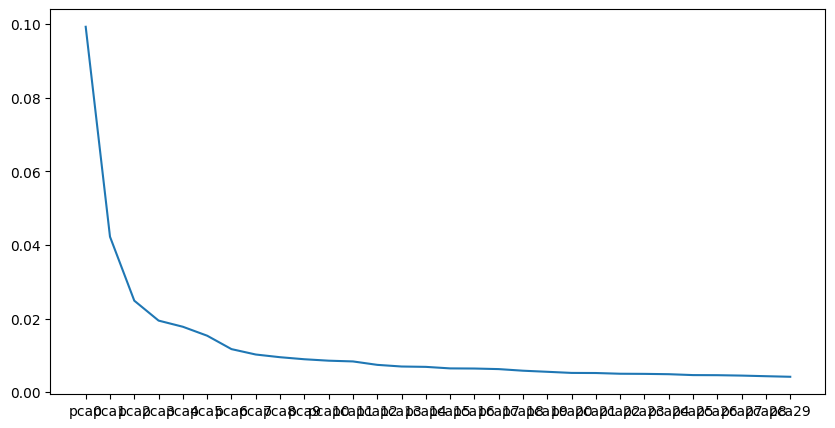

In [94]:
pca = PCA(n_components=30, random_state=21)
x_train_pca = pca.fit_transform(x_train_resampled, y_train_resampled)
x_test_pca = pca.transform(x_test_scaled_df)
fig, ax = plt.subplots(1,1, figsize=(10,5))
ax.plot(pca.get_feature_names_out(), pca.explained_variance_ratio_)
plt.show()

x_train_pca_df = (pd.DataFrame(x_train_pca, columns=pca.get_feature_names_out()))
x_test_pca_df = (pd.DataFrame(x_test_pca, columns=pca.get_feature_names_out()))

## XGBoost Stump Model

In [95]:
xgb_stump = xgb.XGBClassifier(n_estimators=1, max_depth=1)
xgb_stump.fit(x_train_pca_df, y_train_resampled)
xgb_stump.score(x_test_pca_df, y_test)

0.8275328692962104

## XGBoost Model

c:\Users\Daniel Walczak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 11 is smaller than n_iter=100. Running 11 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.97      0.98      0.98       903
           1       0.96      0.92      0.94       390

    accuracy                           0.97      1293
   macro avg       0.96      0.95      0.96      1293
weighted avg       0.97      0.97      0.96      1293



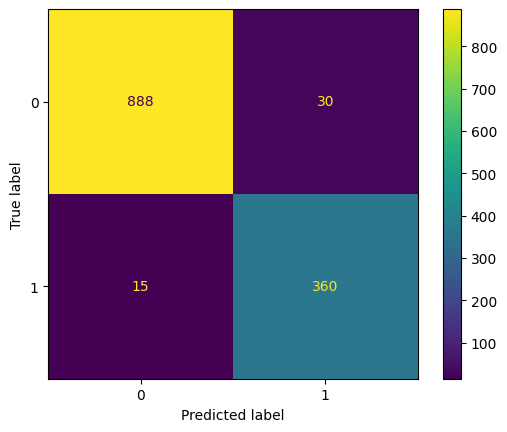

In [96]:
xgb_model = xgb.XGBClassifier(random_state=21)
xgb_model.fit(x_train_pca_df, y_train_resampled)
round(xgb_model.score(x_test_pca_df, y_test),3)
param_distributions = {
    'max_depth': [None] + list(range(10, 30, 2))
}
cv = RandomizedSearchCV(
    estimator = xgb_model,     
    param_distributions=param_distributions,
    n_iter=100,
    cv=5,
    random_state=21)
cv_fitted = cv.fit(x_train_pca_df, y_train_resampled)
cv_predict = cv.predict(x_test_pca_df)
cv_score = cv.score(x_test_pca_df, y_test)
cv_score
cv_scores = classification_report(cv_predict, y_test)
print(cv_scores)
xgb_con_matrix = confusion_matrix(y_test, cv_predict)
disp = ConfusionMatrixDisplay(xgb_con_matrix)
disp.plot()
plt.show()

In [97]:
params = {
'max_depth': list(range(2,40, 2))
}
grid_search = GridSearchCV(estimator=xgb_model,
param_grid=params, cv=5, n_jobs=-1,
verbose=1, scoring="accuracy")
grid_search.fit(x_train_pca_df, y_train_resampled)
params = grid_search.best_params_
new_xgb_model = xgb.XGBClassifier(random_state=21, max_depth=4)
new_xgb_model_fit = new_xgb_model.fit(x_train_pca_df, y_train_resampled)
new_xgb_model_predict = new_xgb_model.predict(x_test_pca_df)
new_xgb_model_score = classification_report(new_xgb_model_predict, y_test)
print(new_xgb_model_score)

Fitting 5 folds for each of 19 candidates, totalling 95 fits
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       904
           1       0.95      0.92      0.93       389

    accuracy                           0.96      1293
   macro avg       0.96      0.95      0.95      1293
weighted avg       0.96      0.96      0.96      1293



# Backwards Elimination

Be prepared this can take up to 3 hours to run.

When running this script, this was typcially given a break point as to not run. This test was attempted twice with both p = 0.05 and p = 0.1

For the sake of exporting this. it has been commented out. However if you wish to see the output of the latest test it is in the data folder titled "Back_elim_results.txt" and "retained features.txt"

In [98]:
# df = pd.read_csv("emails.csv")
# df = df.drop('Email No.', axis=1)
#
# X_df = df.iloc[:, :3000]
# y_df = df['Prediction']
#
#
# X_train, X_test, y_train, y_test = train_test_split(
#     X_df, y_df, test_size=0.2, random_state=21
# )
#
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled  = scaler.transform(X_test)
#
# model = LogisticRegression(max_iter=1000)
# model.fit(X_train_scaled, y_train)
#
# y_hat = model.predict(X_test_scaled)
# print("Sample Predictions:", y_hat[:20])
# print(classification_report(y_test, y_hat))
#
#
# # Convert to numpy for statsmodels
# X_np = X_train_scaled.astype(float)
# y_np = np.asarray(y_train, dtype=float)
#
# # Add constant column
# X_np = np.append(np.ones((len(X_np), 1)), X_np, axis=1)
# feature_names = ["const"] + list(X_df.columns)
#
# cols = list(range(X_np.shape[1]))
# dropped_features = []
# iteration = 1
#
# threshold = 0.1  # p-value threshold
#
# while True:
#     X_sig = X_np[:, cols]
#     model_ols = sm.OLS(endog=y_np, exog=X_sig).fit()
#
#     pvals = dict(zip(cols, model_ols.pvalues))
#
#     # exclude intercept (0)
#     drop_candidates = [c for c in cols if c != 0]
#     worst_col = max(drop_candidates, key=lambda c: pvals[c])
#     worst_p = pvals[worst_col]
#
#     if worst_p > threshold:
#         print(f"Iteration {iteration}: Dropped {feature_names[worst_col]}")
#         dropped_features.append(feature_names[worst_col])
#         cols.remove(worst_col)
#         iteration += 1
#     else:
#         break
#
# retained_features = [feature_names[i] for i in cols]
#
#
# print(f"Total Iterations: {iteration - 1}")
# print(f"Retained Features ({len(retained_features)}):")
# print(retained_features)
#
# print(f"\nDropped ({len(dropped_features)}): {len(dropped_features)} columns")
# from sklearn.linear_model import LinearRegression
#
#
# retained_features = [f for f in retained_features if f != "const"]
# X_train_selected = X_train[retained_features]
# X_test_selected  = X_test[retained_features]
#
# # Make sure y is correct type
# Y_train = y_train.astype(float)
#
# model_selected = LinearRegression()
# model_selected.fit(X_train_selected, Y_train)
#
# print("Intercept:", model_selected.intercept_)
#
# Back_elim_Inter = model_selected.intercept_
#
# Back_elim_coef = pd.DataFrame({
#     "Feature": retained_features,
#     "Coefficient": model_selected.coef_.round(4)
# })
#
# print("\nCoefficients:")
# print(Back_elim_coef)
# # 1. Predict continuous values from the regression model
# y_hat_back = model_selected.predict(X_test_selected)
#
# # 2. Convert continuous → binary predictions
# y_hat_back_class = (y_hat_back >= 0.5).astype(int)
#
# # 3. Now compute confusion matrix
# cm = confusion_matrix(y_test, y_hat_back_class)
# print("Confusion Matrix:\n", cm)
#
# # 4. Optional: classification report
# print("\nClassification Report:")
# print(classification_report(y_test, y_hat_back_class))
#
# mse = mean_squared_error(y_test, y_hat_back)
# rmse = np.sqrt(mse)
#
# print(f"MSE :, {mse: .2f}")
# print(f"RMSE:, {rmse: .2f}")
